THE MODEL SOLVES THE PROBLEM OF RECOGNIZING OF FAKE TWEETS ON TWITTER 
THE MODEL INVOLVES MACHINE LEARNING,DEEP LEARNING AND NATURAL LANGUAGE PROCESSING ALGORITHMS FOR BETTER AND ACCURATE PREDICTIONS.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import classification_report 



In [2]:
train=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
test=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


DATA ANALYZING:

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.shape

(7613, 5)

In [6]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
train.info

<bound method DataFrame.info of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...

In [8]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

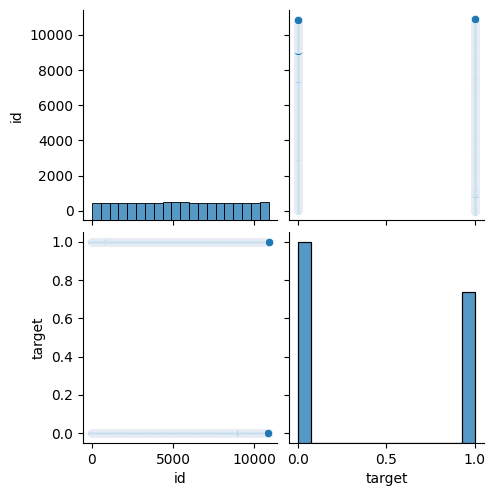

In [10]:
#plotting a pairplot of train dataset
sns.pairplot(train)
plt.show()

In [11]:
#test dataset
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
test.shape

(3263, 4)

In [13]:
test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [14]:
test.info

<bound method DataFrame.info of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
326

In [15]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

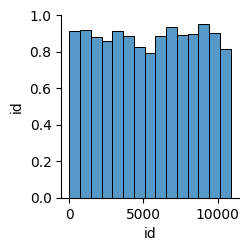

In [16]:
#plotting pairplot for test dataset 
sns.pairplot(test)
plt.show()

MERGING TEST AND TRAIN DATASETS

In [17]:
#Concatenated Dataset
tweets=pd.concat([train,test],axis=0,ignore_index=True)
tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


In [18]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


In [19]:
tweets.shape

(10876, 5)

In [20]:
tweets.describe()

,id,target
count,10876.000000,7613.00000
mean,5437.500000,0.42966
std,3139.775098,0.49506
min,0.000000,0.00000
25%,2718.750000,0.00000
50%,5437.500000,0.00000
75%,8156.250000,1.00000
max,10875.000000,1.00000


In [21]:
tweets.info

<bound method DataFrame.info of           id keyword location  \
0          1     NaN      NaN   
1          4     NaN      NaN   
2          5     NaN      NaN   
3          6     NaN      NaN   
4          7     NaN      NaN   
...      ...     ...      ...   
10871  10861     NaN      NaN   
10872  10865     NaN      NaN   
10873  10868     NaN      NaN   
10874  10874     NaN      NaN   
10875  10875     NaN      NaN   

                                                    text  target  
0      Our Deeds are the Reason of this #earthquake M...     1.0  
1                 Forest fire near La Ronge Sask. Canada     1.0  
2      All residents asked to 'shelter in place' are ...     1.0  
3      13,000 people receive #wildfires evacuation or...     1.0  
4      Just got sent this photo from Ruby #Alaska as ...     1.0  
...                                                  ...     ...  
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...     NaN  
10872  Storm in RI worse than last 

In [22]:
tweets.isnull().sum()

id             0
keyword       87
location    3638
text           0
target      3263
dtype: int64

In [23]:
tweets.isna().sum()

id             0
keyword       87
location    3638
text           0
target      3263
dtype: int64

Now we will be approaching to our problem given to us.So we need to build a model which recognizes the fake tweets and genuine tweets by the twitter users in the whole world

DATA VISUALIZATION:

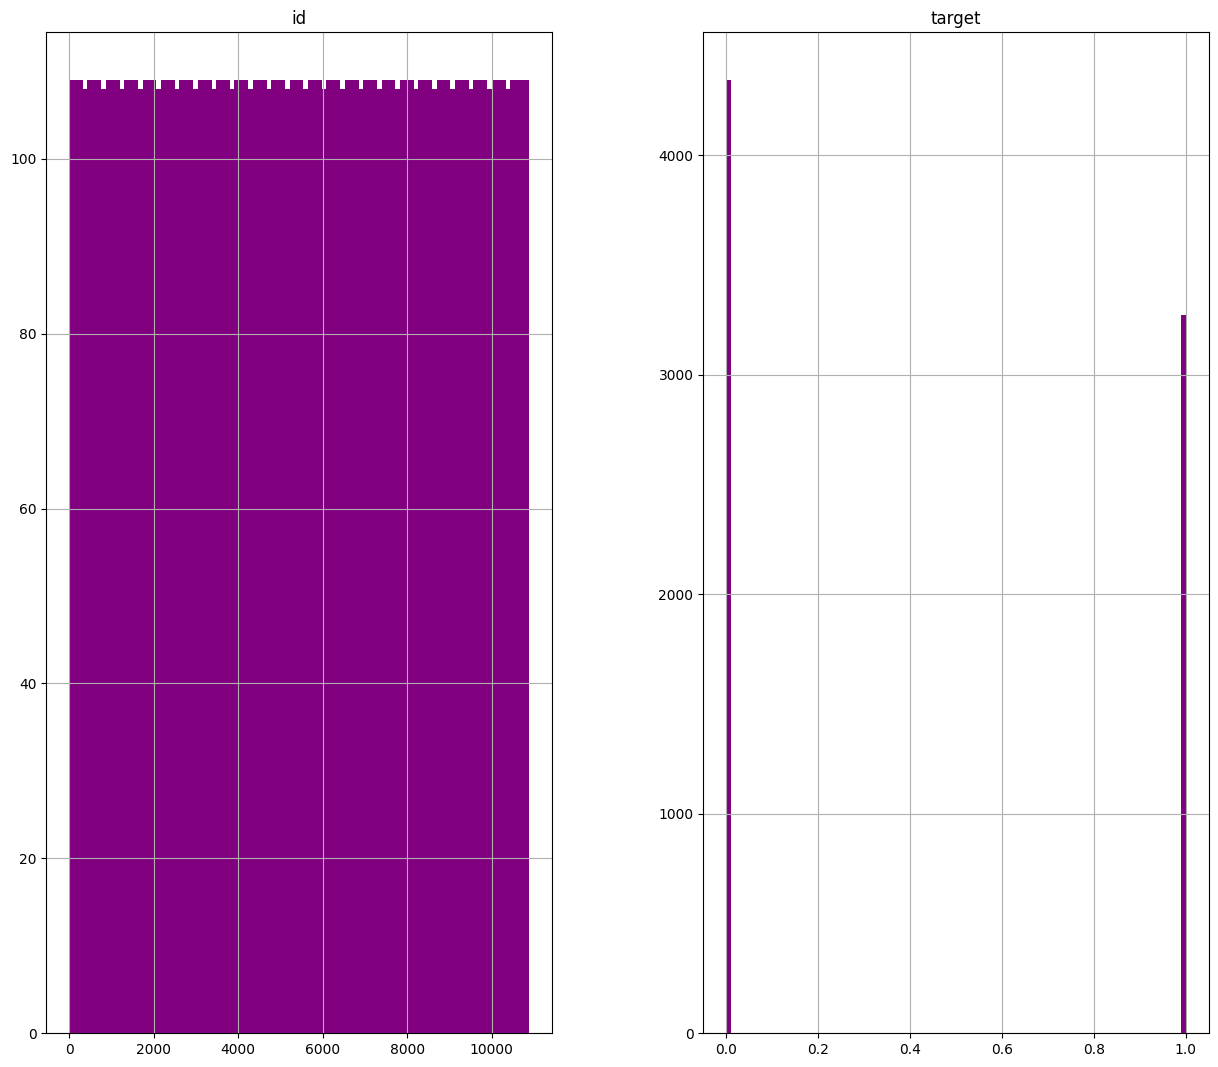

In [24]:
#histplot 
tweets.hist(bins=100,figsize=(15,13),color='purple')
plt.show()

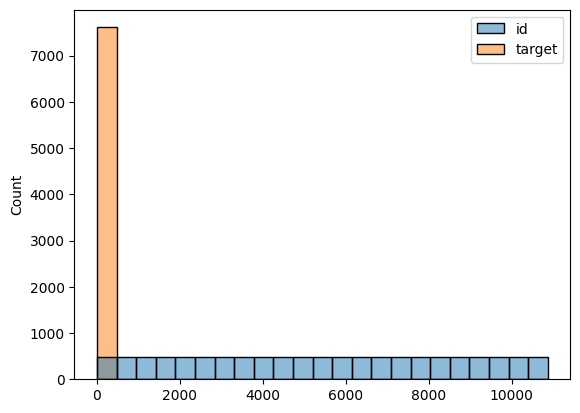

In [25]:
#histplot 
sns.histplot(tweets)
plt.show()

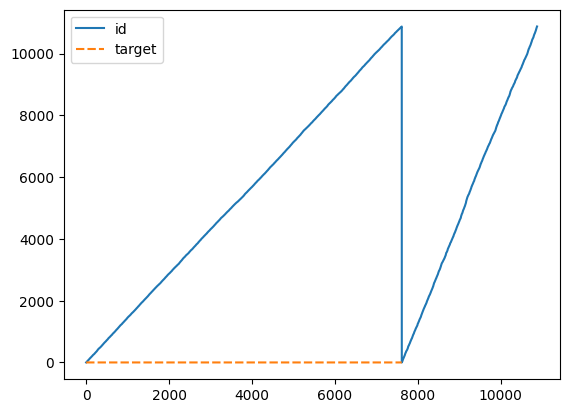

In [26]:
#lineplot
sns.lineplot(tweets)
plt.show()

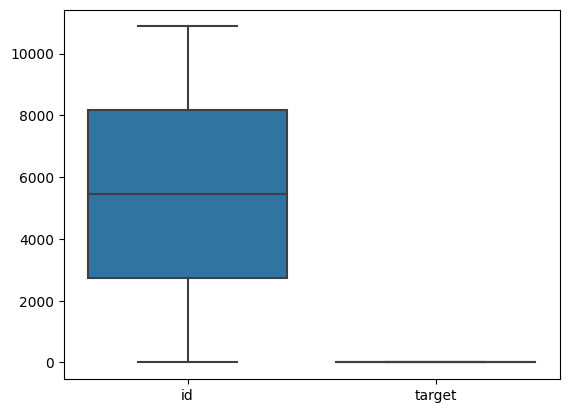

In [27]:
#boxplot
sns.boxplot(tweets)
plt.show()

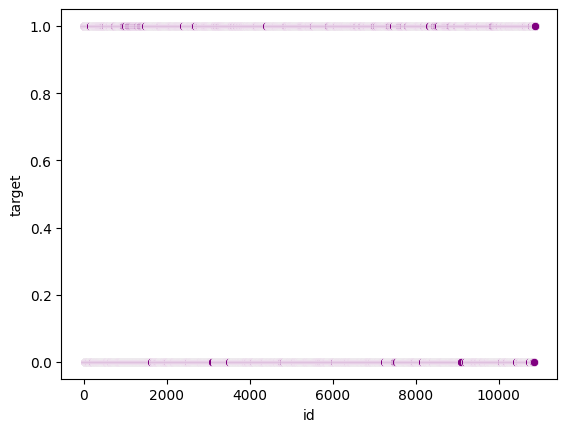

In [28]:
#scatterplot
sns.scatterplot(x='id',y='target',data=tweets,color='purple')
plt.show()

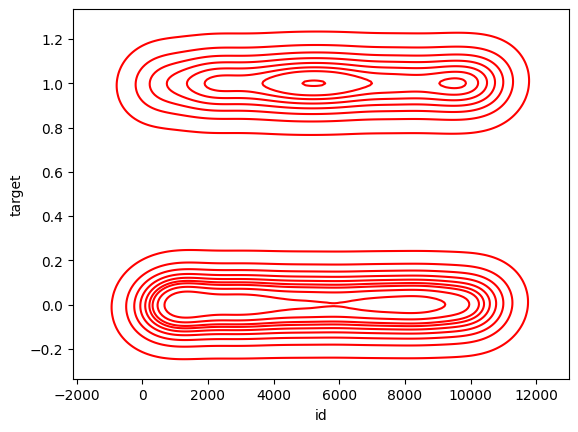

In [29]:
#kdeplot
sns.kdeplot(x='id',y='target',data=tweets,color='r')
plt.show()

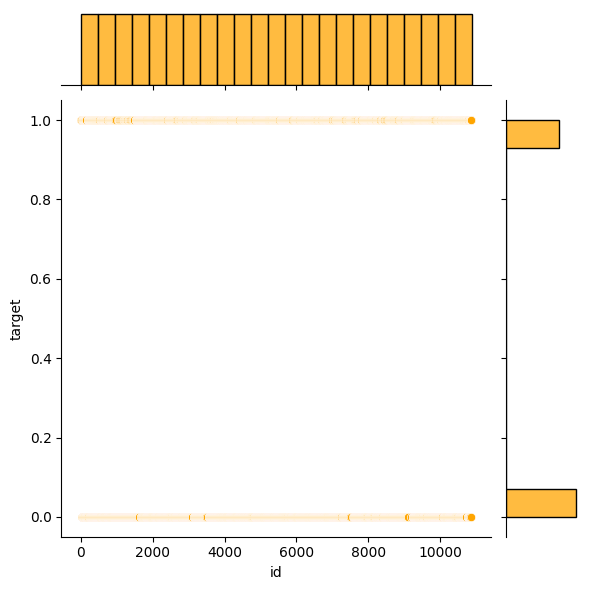

In [30]:
#jointplot
sns.jointplot(x='id',y='target',data=tweets,color='orange')
plt.show()

In [31]:
#plotting graphs using plotly
fig =px.line(tweets['id'])
fig.show()

fig = px.violin(tweets['id'])
fig.show()

fig = px.pie(tweets['id'])
fig.show()

In [32]:
#Value_counts()
tweets['id'].value_counts()

id
1        1
10384    1
10376    1
10377    1
10378    1
        ..
5175     1
5176     1
5177     1
5178     1
10875    1
Name: count, Length: 10876, dtype: int64

In [33]:
tweets['keyword'].value_counts()


keyword
ablaze                   50
lava                     50
loud%20bang              50
mass%20murder            50
massacre                 50
                         ..
forest%20fire            24
threat                   16
radiation%20emergency    14
inundation               14
epicentre                13
Name: count, Length: 221, dtype: int64

In [34]:
tweets['location'].value_counts()

location
USA                       141
New York                  109
United States              65
London                     58
Canada                     42
                         ... 
Brooklyn                    1
St.Cloud, MN                1
on a catwalk somewhere      1
  å_                        1
Brussels, Belgium           1
Name: count, Length: 4521, dtype: int64

In [35]:
tweets['text'].value_counts()

text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        13
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     8
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam                      7
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'                               7
.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4           6
                                                                                                                                                ..
'Motordom' lobbied to change our language around traffic fatalities. We need to go back to the future #VisionZero

In [36]:
tweets['target'].value_counts()

target
0.0    4342
1.0    3271
Name: count, dtype: int64

Now we will be using NLP techniques to train our model to recognize whether the tweets are genuine or fake.So the vectors 1 will be used for genuine tweets and 0 for fake tweets.

DATA PREPROCESSING:


In [37]:
#importing libraries 
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer 
import spacy
from nltk.tokenize.toktok import ToktokTokenizer

In [38]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
#Tokenization of text
nlp =spacy.load("en_core_web_sm")
text ="Forest fire near La Ronge Sask.Canada"


#PROCESSING 
doc=nlp(text)

#Tokens
tokens=[token.text for token in doc]
print(tokens)

['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', '.', 'Canada']


In [40]:
#Removing stopwords 
def remove_stop_words(sentence):
    stop_words=set(stopwords.words('english'))
    words=nltk.word_tokenize(sentence)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return' '.join(filtered_words)

input='Assads use of barrel bombs means no opposotion area safe contributing to 4M Syrian refugees,Before accident the press called deadly driving "homocide by automobile", '
output=remove_stop_words(input)
print(output)

Assads use barrel bombs means opposotion area safe contributing 4M Syrian refugees , accident press called deadly driving `` homocide automobile '' ,


In [41]:

text=tweets.drop(['keyword','location','target'],axis=1)

In [42]:
text

,id,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,4,Forest fire near La Ronge Sask. Canada
2,5,All residents asked to 'shelter in place' are ...
3,6,"13,000 people receive #wildfires evacuation or..."
4,7,Just got sent this photo from Ruby #Alaska as ...
...,...,...
10871,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872,10865,Storm in RI worse than last hurricane. My city...
10873,10868,Green Line derailment in Chicago http://t.co/U...
10874,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [43]:
#Tokenization 
from nltk.tokenize.toktok import ToktokTokenizer 
#tokenizer
tokenizer=ToktokTokenizer()
text=text
#tokens
tokens=tokenizer.tokenize(text)
#print
print(tokens)

['id', 'text', '0', '1', 'Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'M', '...', '1', '4', 'Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada', '2', '5', 'All', 'residents', 'asked', 'to', "'", 'shelter', 'in', 'place', "'", 'are', '...', '3', '6', '13,000', 'people', 'receive', '#wildfires', 'evacuation', 'or', '...', '4', '7', 'Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#Alaska', 'as', '...', '...', '...', '...', '10871', '10861', 'EARTHQUAKE', 'SAFETY', 'LOS', 'ANGELES', '\x89ÛÒ', 'SAFETY', 'FASTE', '...', '10872', '10865', 'Storm', 'in', 'RI', 'worse', 'than', 'last', 'hurricane.', 'My', 'city', '...', '10873', '10868', 'Green', 'Line', 'derailment', 'in', 'Chicago', 'http://t.co/U', '...', '10874', '10874', 'MEG', 'issues', 'Hazardous', 'Weather', 'Outlook', '(', 'HWO', ')', 'htt', '...', '10875', '10875', '#CityofCalgary', 'has', 'activated', 'its', 'Municipal', 'Eme', '...', '[', '10876', 'rows', 'x', '2', 'columns', ']']


In [44]:
#Stemming 
porter_stemmer = PorterStemmer()
#apply stemming
stemmed_tokens=[porter_stemmer.stem(token)for token in tokens]
#print 
print(stemmed_tokens)

['id', 'text', '0', '1', 'our', 'deed', 'are', 'the', 'reason', 'of', 'thi', '#earthquak', 'M', '...', '1', '4', 'forest', 'fire', 'near', 'La', 'rong', 'sask.', 'canada', '2', '5', 'all', 'resid', 'ask', 'to', "'", 'shelter', 'in', 'place', "'", 'are', '...', '3', '6', '13,000', 'peopl', 'receiv', '#wildfir', 'evacu', 'or', '...', '4', '7', 'just', 'got', 'sent', 'thi', 'photo', 'from', 'rubi', '#alaska', 'as', '...', '...', '...', '...', '10871', '10861', 'earthquak', 'safeti', 'lo', 'angel', '\x89ûò', 'safeti', 'fast', '...', '10872', '10865', 'storm', 'in', 'RI', 'wors', 'than', 'last', 'hurricane.', 'My', 'citi', '...', '10873', '10868', 'green', 'line', 'derail', 'in', 'chicago', 'http://t.co/u', '...', '10874', '10874', 'meg', 'issu', 'hazard', 'weather', 'outlook', '(', 'hwo', ')', 'htt', '...', '10875', '10875', '#cityofcalgari', 'ha', 'activ', 'it', 'municip', 'eme', '...', '[', '10876', 'row', 'x', '2', 'column', ']']


Train_test_split 

In [45]:
#splitting dataset
x = text['text']
y = text['id']

In [46]:
from sklearn.model_selection import train_test_split 
x_train,x_text,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

BAG OF WORDS:

In [47]:
#Converting text into Vectors
corpus = text
#Vectorizer 
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(corpus)
#feature names
feature_names= vectorizer.get_feature_names_out()
#convert bag of words
X_array=X.toarray()
print(X_array)
print(feature_names)

[[1 0]
 [0 1]]
['id' 'text']


In [48]:
#print text
X_array

array([[1, 0],
       [0, 1]])

TF-IDF:

In [49]:
#Tf-IdF
corpus2=text
#Tfidf Vectorizer 
vectorizer = TfidfVectorizer()
tfidf_matrix=vectorizer.fit_transform(corpus)
feature_names2=vectorizer.get_feature_names_out()
tfidf_array =tfidf_matrix.toarray()

print(tfidf_array)
print(feature_names)

[[1. 0.]
 [0. 1.]]
['id' 'text']


In [50]:
#print text
X_array

array([[1, 0],
       [0, 1]])

In [51]:
#recognise tweets
tfidf_array 

array([[1., 0.],
       [0., 1.]])

Now we have finally converted the text of tweets to numerical vectors and with the help of some nlp techniques we got our results.

The Matrix in the tfidf array predicts our results.

The 1 in the matrix shows that the tweet is genuine and 0 shows that the tweet is fake.

Hope you liked it!!

LogisticRegression: